In [1]:
import os
import sys
from pathlib import Path

# sys.path.append(str(Path("../..").absolute()))
# print(sys.path)

from typing import List, Callable, Optional

import numpy as np
import torch as t
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
from serimats.paths.experiment import make_ensembles, experiments

In [2]:
experiment = next(make_ensembles(
    [experiments[0]],
    logging_ivl=100,
    plot_ivl=2000,
    save_ivl=1000,
))
experiment.load()
df = experiment.df()

# df["d_w_from_baseline_normed"].plot()
df

,step,Unnamed: 0,w,d_w_from_baseline,d_w_from_init,w_corr_with_baseline,w_autocorr,cos_sim_from_baseline,cos_sim_from_init,w_normed,...,differentiable,epsilon,lr,momentum,n_hidden,nesterov,perturbation,seed_perturbation,seed_weights,weight_decay
0,0,0,14.847733,0.000000,0.000000,220.455185,0.002773,inf,inf,1.000000,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
1,100,1,14.879889,0.000000,0.870474,221.411133,0.002774,inf,inf,1.002166,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
2,200,2,14.960581,0.000000,1.503242,223.819046,0.002780,inf,inf,1.007600,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
3,300,3,15.047026,0.000000,1.969412,226.413147,0.002786,inf,inf,1.013422,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
4,400,4,15.121618,0.000000,2.312612,228.663574,0.002791,inf,inf,1.018446,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,75600,756,20.588247,22.158869,12.915708,176.739075,0.003003,inf,inf,1.386626,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0
757,75700,757,20.592821,22.165619,12.922675,176.781921,0.003003,inf,inf,1.386934,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0
758,75800,758,20.597057,22.171665,12.928998,176.821106,0.003003,inf,inf,1.387219,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0
759,75900,759,20.601601,22.177361,12.935295,176.887238,0.003003,inf,inf,1.387525,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0


In [6]:
df["d_w_from_baseline_normed"], df["w_normed"]

(0      0.000000
 1      0.000000
 2      0.000000
 3      0.000000
 4      0.000000
          ...   
 756    1.492407
 757    1.492862
 758    1.493269
 759    1.493653
 760    1.493929
 Name: d_w_from_baseline_normed, Length: 31201, dtype: float64,
 0      1.000000
 1      1.002166
 2      1.007600
 3      1.013422
 4      1.018446
          ...   
 756    1.386626
 757    1.386934
 758    1.387219
 759    1.387525
 760    1.387795
 Name: w_normed, Length: 31201, dtype: float64)

/var/folders/pw/6c492xhs4299155z1pvbwt8w0000gn/T/ipykernel_6727/3908893336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[row.Index]["d_w_from_baseline_normed"] /= row.w_normed


,step,Unnamed: 0,w,d_w_from_baseline,d_w_from_init,w_corr_with_baseline,w_autocorr,cos_sim_from_baseline,cos_sim_from_init,w_normed,...,differentiable,epsilon,lr,momentum,n_hidden,nesterov,perturbation,seed_perturbation,seed_weights,weight_decay
0,0,0,14.847733,0.000000,0.000000,220.455185,0.002773,inf,inf,1.000000,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
1,100,1,14.879889,0.000000,0.870474,221.411133,0.002774,inf,inf,1.002166,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
2,200,2,14.960581,0.000000,1.503242,223.819046,0.002780,inf,inf,1.007600,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
3,300,3,15.047026,0.000000,1.969412,226.413147,0.002786,inf,inf,1.013422,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
4,400,4,15.121618,0.000000,2.312612,228.663574,0.002791,inf,inf,1.018446,...,False,0.0,0.01,0.0,"(100,)",False,relative,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,75600,756,20.588247,22.158869,12.915708,176.739075,0.003003,inf,inf,1.386626,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0
757,75700,757,20.592821,22.165619,12.922675,176.781921,0.003003,inf,inf,1.386934,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0
758,75800,758,20.597057,22.171665,12.928998,176.821106,0.003003,inf,inf,1.387219,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0
759,75900,759,20.601601,22.177361,12.935295,176.887238,0.003003,inf,inf,1.387525,...,False,1.0,0.01,0.0,"(100,)",False,relative,9,1,0.0


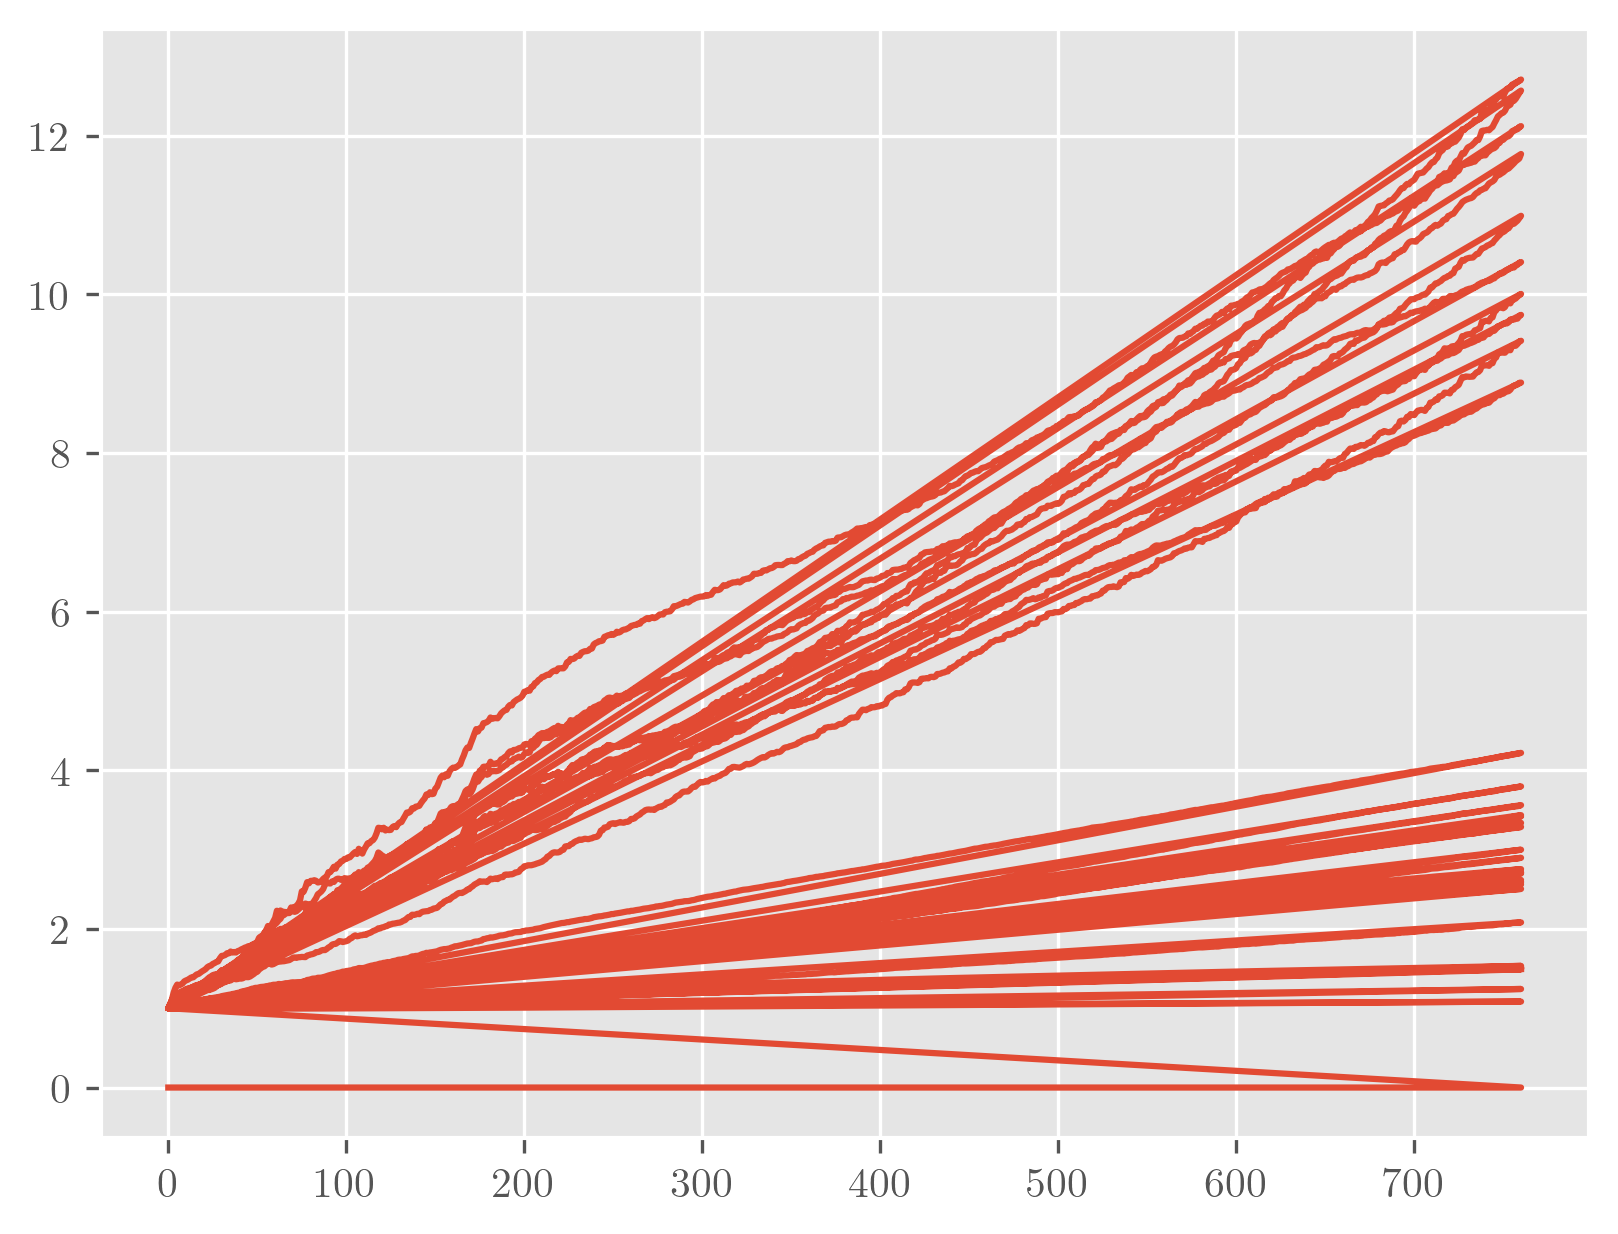

In [3]:
# df = df.assign(_d_w_from_baseline_normed=df["d_w_from_baseline_normed"])
# Multiply d_w_from_baseline_normed by the w column & divide by the initial w value (grouped by seed_perturbation) 

initial_ws = df.copy().loc[df["step"] == 0].groupby("seed_perturbation")["w"].first()

for row in df.itertuples():
    # print(row.Index, row.d_w_from_baseline_normed, row.w_normed)
    df.loc[row.Index]["d_w_from_baseline_normed"] /= row.w_normed

df["d_w_from_baseline_normed"].plot()
df

/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


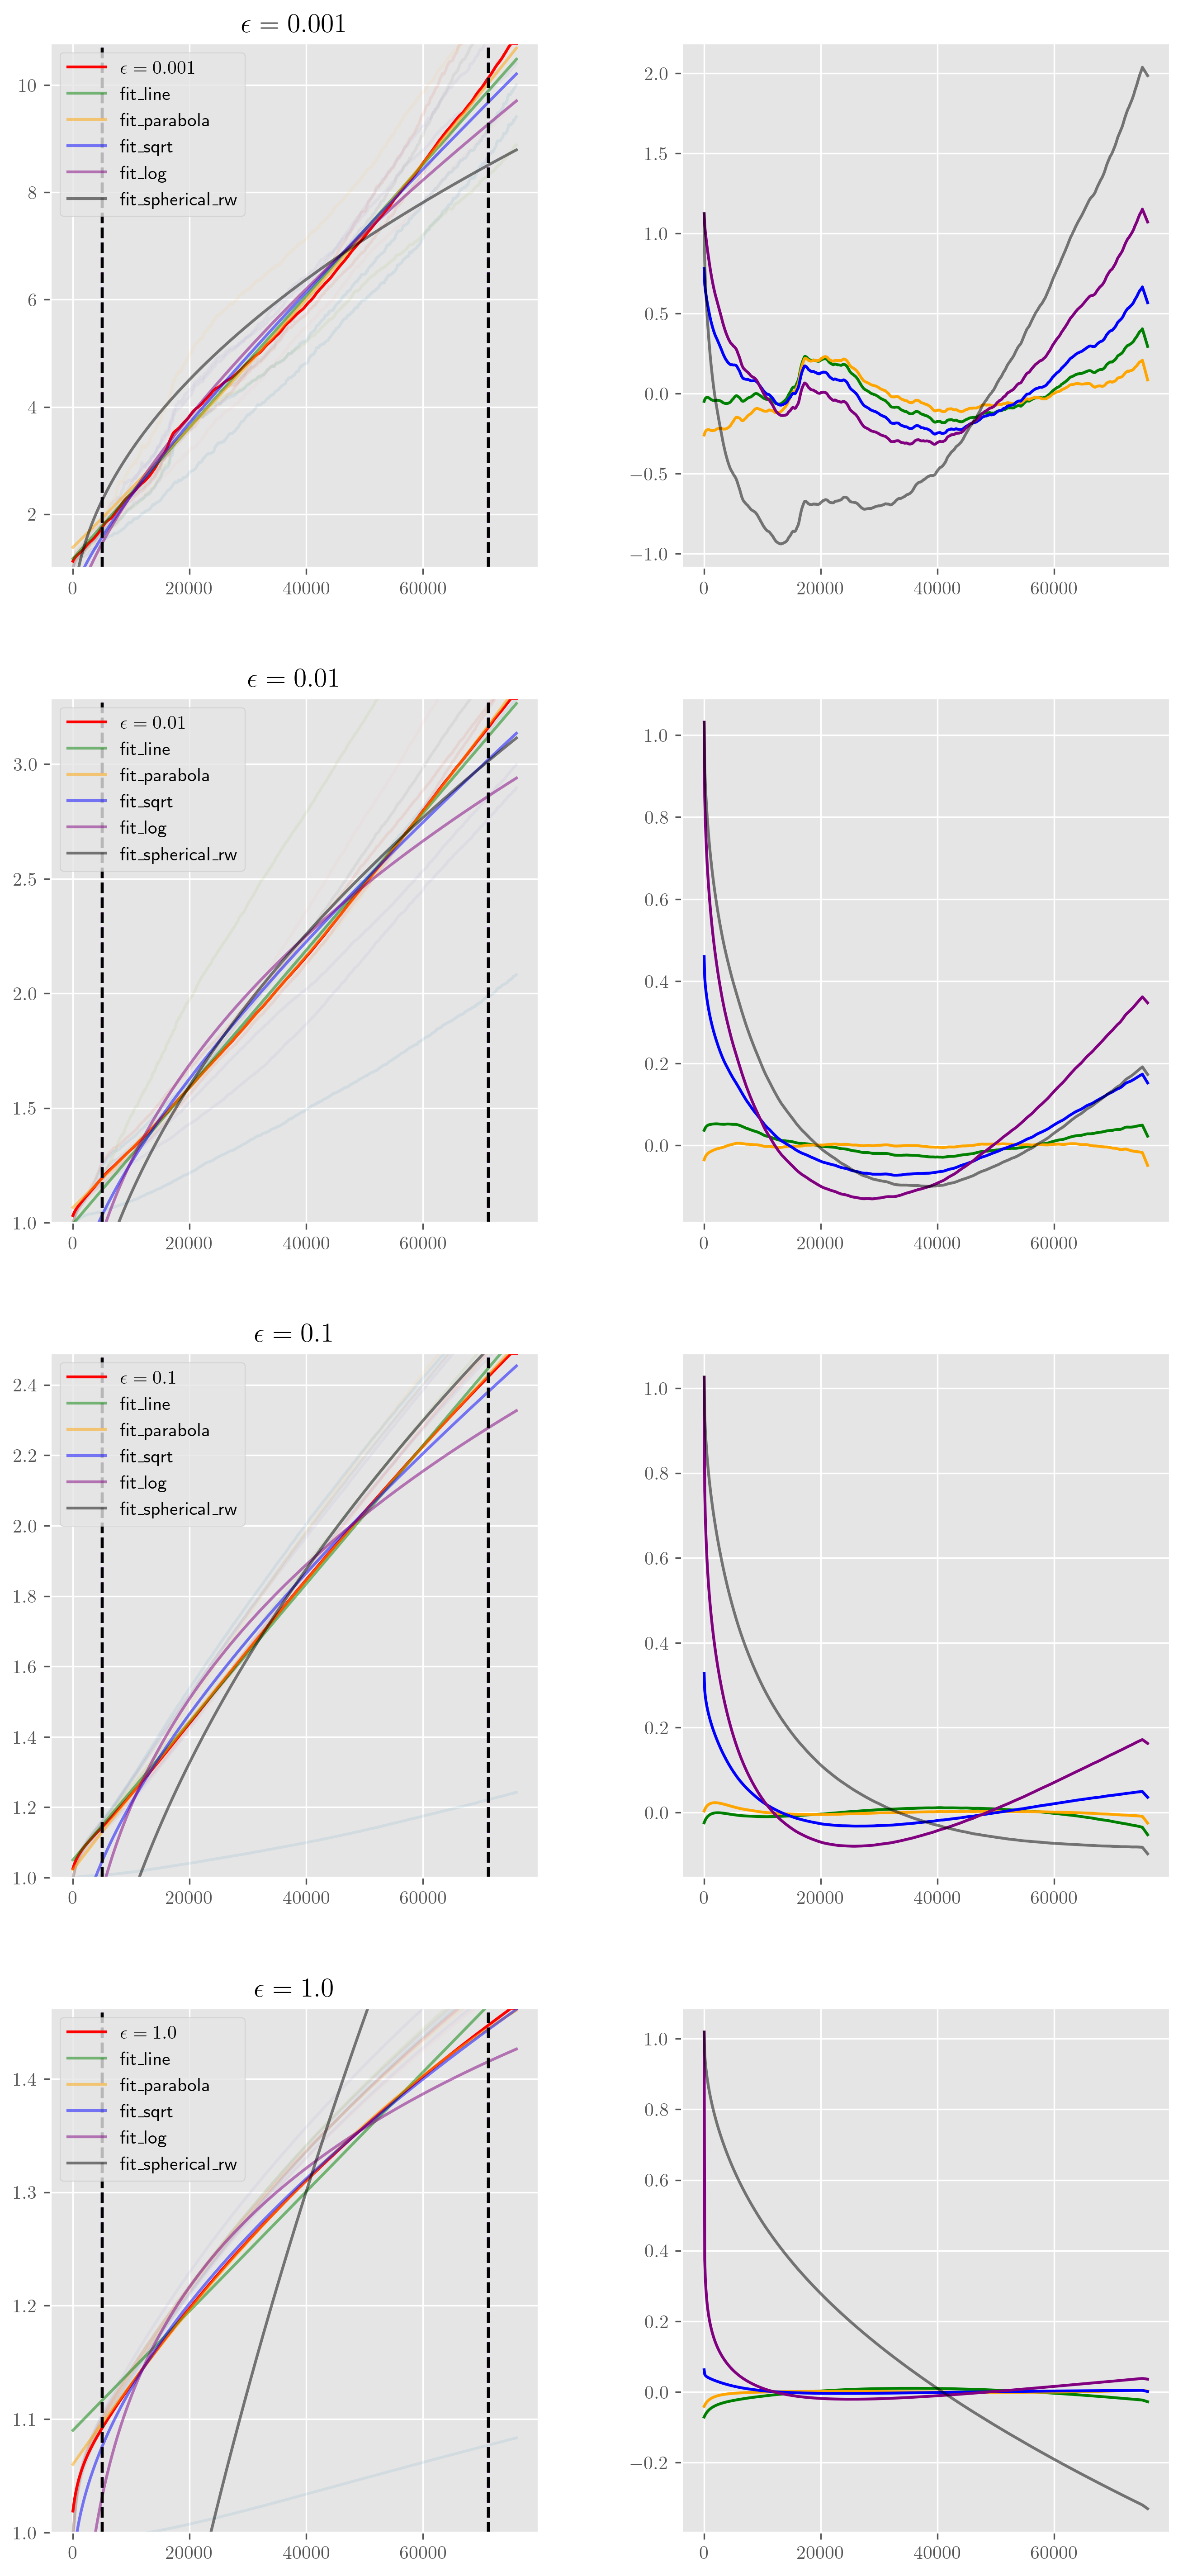

In [11]:
from scipy import stats
import scipy


epsilons = df["epsilon"].unique()
epsilons = np.sort(epsilons)[1:]

fig, axs = plt.subplots(len(epsilons), 2, figsize=(10, 20))

fig.tight_layout(pad=5.0)

def plot_fit(
    x: np.ndarray, 
    y: np.ndarray, 
    fit: Callable,
    start: int = 0, 
    end: int = -1, 
    ax: Optional[plt.Axes] = None, 
    color: str = "red",
    **kwargs
):
    if end < 0:
        end = len(x) + end + 1

    yhat = fit(x, y, start, end)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.plot(x, yhat, color=color, label=fit.__name__, **kwargs)

    if start != 0:
        ax.axvline(x[start], color=color, linestyle="--")
    if end != -1:
        ax.axvline(x[end], color=color, linestyle="--")

    return yhat
 
def plot_residues(
    x: np.ndarray,
    y: np.ndarray,
    yhat: np.ndarray,
    ax: Optional[plt.Axes] = None,
    color: str = "red",
    **kwargs
): 
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.plot(x, y - yhat, color=color, **kwargs)



def fit_line(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    m, b, r_value, p_value, std_err = stats.linregress(x[start:end], y[start:end])
    return m * x + b

def fit_parabola(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    z = np.polyfit(x[start:end], y[start:end], 2)
    f = np.poly1d(z)
    return f(x)

def fit_log(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    return np.exp(fit_line(np.log(x), np.log(y), start=start, end=end))

def fit_sqrt(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    return fit_line(np.sqrt(x), np.sqrt(y), start=start, end=end) ** 2.

def fit_exp_decaying_slope(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    return fit_line(x, y, start=start, end=end) * np.exp(-x)


def fit_spherical_rw(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    # cos(theta) = np.exp(-D * (n-1) * x / (r ** 2))
    # y = 2 * r * np.sqrt((1- cos(theta)) / 2)

    def f(x, D_tilde, r):
        # D_tilde = D * (n-1) 
        return 2 * r * np.sqrt((1 - np.exp(-D_tilde * x / r ** 2)) / 2)
    
    popt, pcov = scipy.optimize.curve_fit(f, x[start:end], y[start:end], p0=(0.000001, 5))

    return f(x, *popt)

for epsilon, (ax, ax2)  in zip(epsilons, axs):
    data = df.loc[df["epsilon"] == epsilon]

    ax.set_title(f"$\\epsilon = {epsilon}$")
    average = data.groupby("step").mean(numeric_only=True)
    average.reset_index(inplace=True)

    for seed in data["seed_perturbation"].unique():
        data_seed = data.loc[data["seed_perturbation"] == seed]
        ax.plot(data_seed["step"], data_seed["d_w_from_baseline_normed"], label=f"_$\epsilon = {epsilon}$", alpha=0.1)

    # Plot averages
    averages = average["d_w_from_baseline_normed"]
    # Windowed average (10)
    averages = np.convolve(averages, np.ones((10,))/10, mode='valid')
    # Pad
    averages = np.pad(averages, (0, len(average) - len(averages)), mode="edge")

    ax.plot(average["step"], averages, label=f"$\epsilon = {epsilon}$", color="red")

    # Fit a line
    line_fit = plot_fit(average["step"], averages, fit_line, ax=ax, color="green", alpha=0.5, start=50, end=-50)
    plot_residues(average["step"], averages, line_fit, ax=ax2, color="green")

    # Fit a parabola
    parabola_fit = plot_fit(average["step"], averages, fit_parabola, ax=ax, color="orange", alpha=0.5, start=50, end=-50)
    plot_residues(average["step"], averages, parabola_fit, ax=ax2, color="orange")

    # Fit a square root
    sqrt_fit = plot_fit(average["step"], averages, fit_sqrt, ax=ax, color="blue", alpha=0.5, start=50, end=-50)
    plot_residues(average["step"], averages, sqrt_fit, ax=ax2, color="blue")

    # Fit a log
    log_fit = plot_fit(average["step"], averages, fit_log, ax=ax, color="purple", alpha=0.5, start=50, end=-50)
    plot_residues(average["step"], averages, log_fit, ax=ax2, color="purple")

    spherical_rw_fit = plot_fit(average["step"], averages, fit_spherical_rw, ax=ax, color="black", alpha=0.5, start=50, end=-50)
    plot_residues(average["step"], averages, spherical_rw_fit, ax=ax2, color="black", alpha=0.5)

    # ax.set_yscale("log")
    ax.set_ylim(1., averages.max())
    ax.legend()

    # ax2.set_ylim(-0.2, 0.2)


plt.show()

/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/Jesse/.virtualenvs/notes/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[3.28052419e-04 9.09332493e-01 1.00000000e+00]
[3.53691620e-05 9.82498682e-01 1.00000000e+00]
[4.88382836e-05 9.20886364e-01 1.00000000e+00]
[4.29708355e-04 6.21064085e-01 1.00000000e+00]


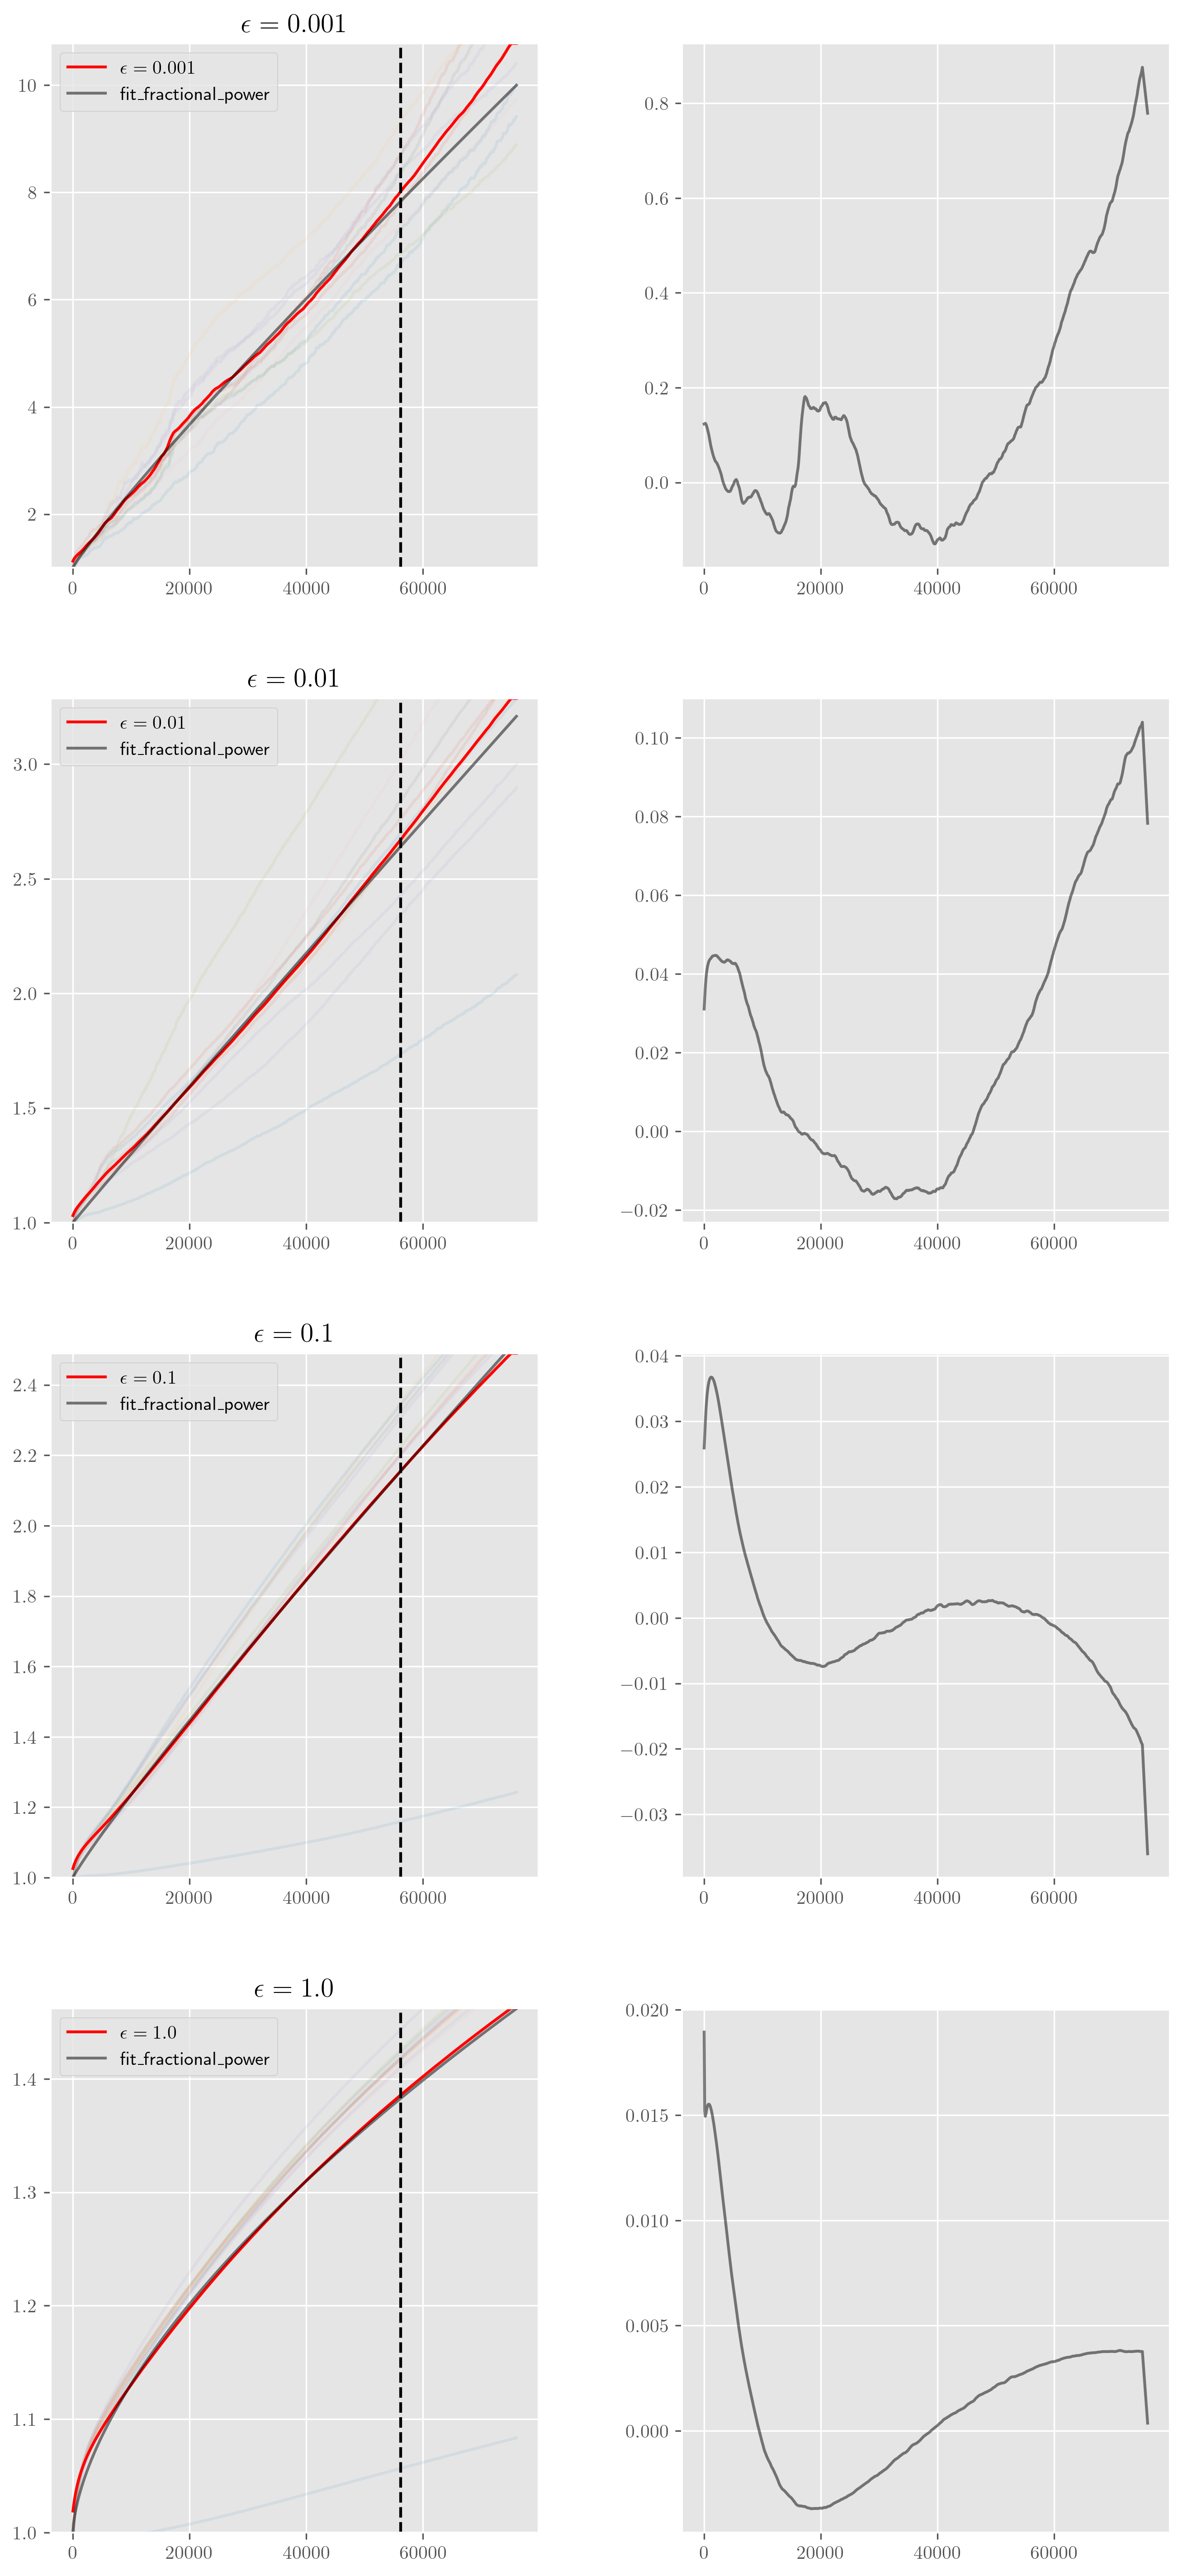

In [36]:
from functools import partial
from scipy import stats
import scipy


epsilons = df["epsilon"].unique()
epsilons = np.sort(epsilons)[1:]

fig, axs = plt.subplots(len(epsilons), 2, figsize=(10, 20))

fig.tight_layout(pad=5.0)


# def fit_spherical_rw(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1, r=1., n=2) -> np.ndarray:
#     # cos(theta) = np.exp(-D * (n-1) * x / (r ** 2))
#     # y = 2 * r * np.sqrt((1- cos(theta)) / 2)

#     def f(x, D):
#         return 2 * r * np.sqrt((1 - np.exp(-D * (n-1) * x / r ** 2)) / 2) + 1
    
#     popt, pcov = scipy.optimize.curve_fit(f, x[start:end], y[start:end], p0=(10e-18))

#     return f(x, *popt)

def fit_fractional_power(x: np.ndarray, y: np.ndarray, start: int = 0, end: int = -1) -> np.ndarray:
    # f(x) = a x^b + c

    def f(x, a, b, c):
        return a * (x ** b) + 1
        # return a + b * x + c * x ** .5
    
    popt, pcov = scipy.optimize.curve_fit(f, x[start:end], y[start:end])
    print(popt)

    return f(x, *popt)



for epsilon, (ax, ax2)  in zip(epsilons, axs):
    data = df.loc[df["epsilon"] == epsilon]

    ax.set_title(f"$\\epsilon = {epsilon}$")
    average = data.groupby("step").mean(numeric_only=True)
    average.reset_index(inplace=True)

    for seed in data["seed_perturbation"].unique():
        data_seed = data.loc[data["seed_perturbation"] == seed]
        ax.plot(data_seed["step"], data_seed["d_w_from_baseline_normed"], label=f"_$\epsilon = {epsilon}$", alpha=0.1)

    # Plot averages
    averages = average["d_w_from_baseline_normed"]
    # Windowed average (10)
    averages = np.convolve(averages, np.ones((10,))/10, mode='valid')
    # Pad
    averages = np.pad(averages, (0, len(average) - len(averages)), mode="edge")

    ax.plot(average["step"], averages, label=f"$\epsilon = {epsilon}$", color="red")


    n_params = (784 + 1) * 100 + (100 + 1) * 10 + (10 + 1) * 10
    # fitter = partial(fit_spherical_rw, r=data["w"].to_numpy()[-1], n=n_params)
    # fitter.__name__ = "fit_spherical_rw"
    
    # spherical_rw_fit = plot_fit(average["step"], averages, fitter, ax=ax, color="black", alpha=0.5, start=50, end=-50)
    # plot_residues(average["step"], averages, spherical_rw_fit, ax=ax2, color="black", alpha=0.5)

    fractional_power_fit = plot_fit(average["step"], averages, fit_fractional_power, ax=ax, color="black", alpha=0.5, start=0, end=-200)
    plot_residues(average["step"], averages, fractional_power_fit, ax=ax2, color="black", alpha=0.5)

    # ax.set_yscale("log")
    ax.set_ylim(1., averages.max())
    ax.legend()

    # ax2.set_ylim(-0.2, 0.2)


plt.show()

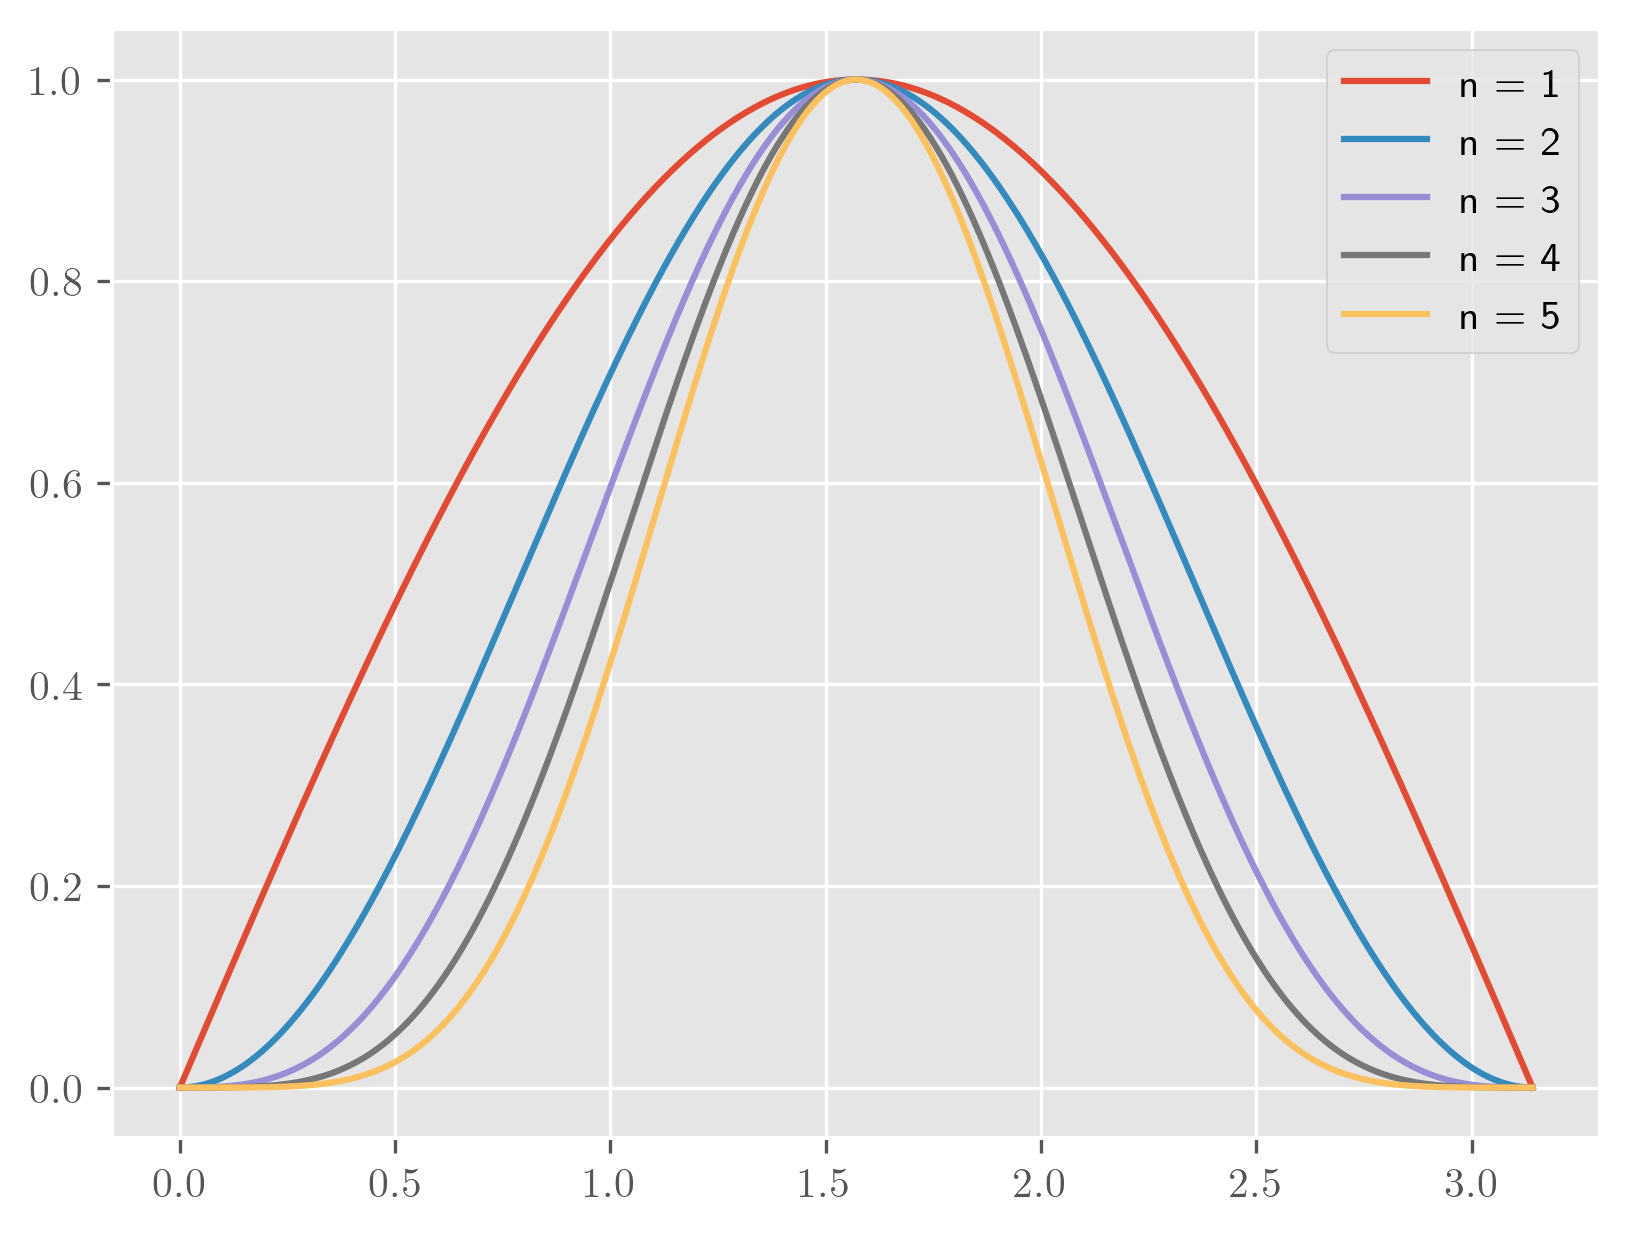

In [19]:
# Plot f_n(x) = (sin(x)) ** n for n = 1, 2, 3, 4, 5 over the interval [0, pi]

theta = np.linspace(0, np.pi, 1000)

def f(x, n): 
    return np.sin(x) ** n

plt.plot(theta, f(theta, 1), label="n = 1")
plt.plot(theta, f(theta, 2), label="n = 2")
plt.plot(theta, f(theta, 3), label="n = 3")
plt.plot(theta, f(theta, 4), label="n = 4")
plt.plot(theta, f(theta, 5), label="n = 5")

plt.legend()

